In [34]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Telsa Image Classification Project
## By Jackie Nguyen
Github: aznone5, linkedin: https://www.linkedin.com/in/jackie-nguyen-80a945135/

## 1. About
This project uses image classification using tensorflow, finding out what kind of Tesla Model a car is.

## 2. Data
The images were scraped on google, and on tesla gallery website.

## 3. Features
Information about the data:
* We are using images of Telsa's, found online on google images or on Telsa's offical gallery.
* We choose to deal with 6 different models, 
    * 1. Telsa Model X,
    * 2. Telsa Model Y,
    * 3. Telsa Model S,
    * 4. Telsa Model 3,
    * 5. Telsa Roadster,
    * 6. Telsa CyberTruck,

In [4]:
# Csv file used to label all the file names and corresponding to the model of the car.
labels_csv = pd.read_csv("C:/Users/Jacki/anaconda mini/Cars for classification project/Train.csv", delimiter = ',')
labels_csv

Filename        Model name
0     tesla_cybertuck (1).ashx  telsa_cybertruck
1     tesla_cybertuck (1).jpeg  telsa_cybertruck
2      tesla_cybertuck (1).jpg  telsa_cybertruck
3      tesla_cybertuck (1).php  telsa_cybertruck
4      tesla_cybertuck (1).png  telsa_cybertruck
...                        ...               ...
1143   telsa_roadster (95).jpg    telsa_roadster
1144   telsa_roadster (96).jpg    telsa_roadster
1145   telsa_roadster (97).jpg    telsa_roadster
1146   telsa_roadster (98).jpg    telsa_roadster
1147   telsa_roadster (99).jpg    telsa_roadster

[1148 rows x 2 columns]

In [5]:
labels_csv["Model name"].value_counts()

tesla_model_s       267
tesla_model_x       251
tesla_model_3       231
telsa_cybertruck    149
tesla_model_y       134
telsa_roadster      116
Name: Model name, dtype: int64

In [6]:
# create pathnames from image ID's
filenames = ["C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/" + fname for fname in labels_csv["Filename"]]

# Check the first 10
filenames[:10]

['C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (1).ashx',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (1).jpeg',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (1).jpg',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (1).php',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (1).png',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (10).jpg',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (10).png',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (100).jpg',
 'C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/tesla_cybertuck (101).jpg',
 'C:/Users/Jacki/anaconda min

In [7]:
# Checking whether the number of filenames matches the amount of actual image files
import os
if len(os.listdir("C:/Users/Jacki/anaconda mini/Cars for classification project/Photos/All Photos/")) == len(filenames):
    print("Filenames match actual amount of files")
else:
    print("Filename do not match")

Filenames match actual amount of files


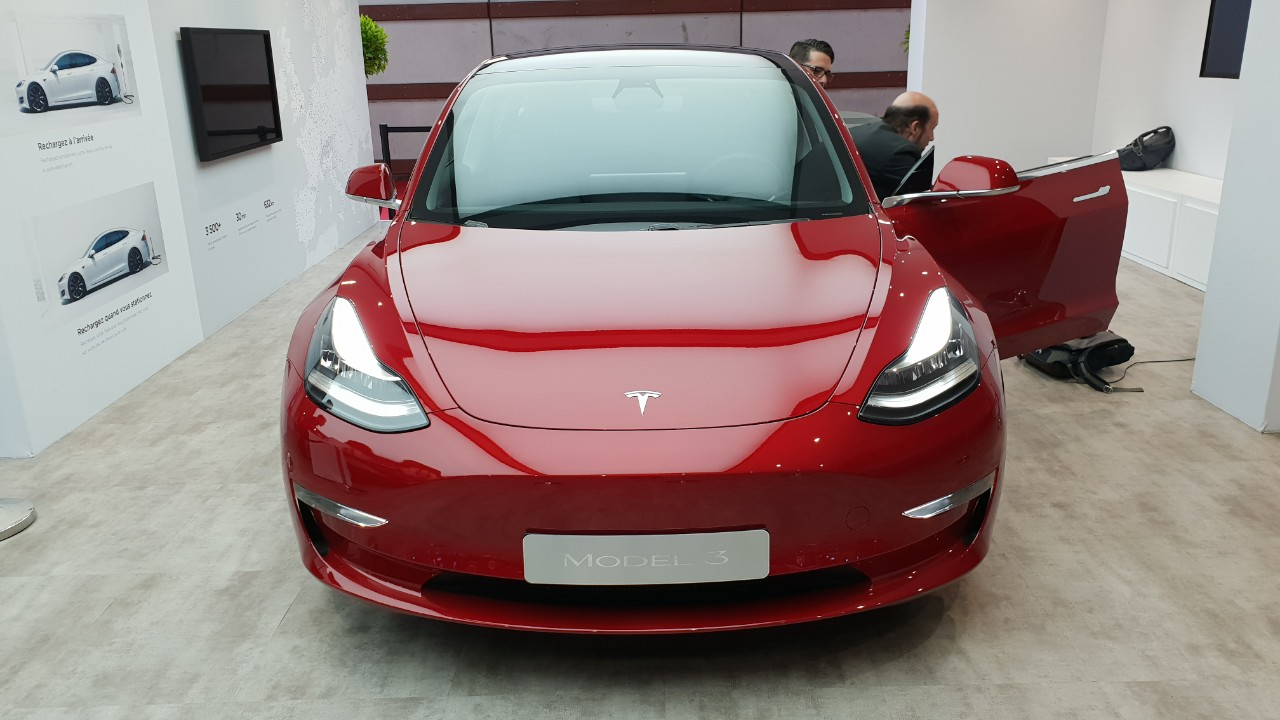

In [8]:
from IPython.display import Image
Image(filenames[222])

In [9]:
car_models = labels_csv["Model name"].to_numpy()
car_models

array(['telsa_cybertruck', 'telsa_cybertruck', 'telsa_cybertruck', ...,
       'telsa_roadster', 'telsa_roadster', 'telsa_roadster'], dtype=object)

In [10]:
# All unique Telsa Models used
unique_models = np.unique(car_models)
unique_models

array(['telsa_cybertruck', 'telsa_roadster', 'tesla_model_3',
       'tesla_model_s', 'tesla_model_x', 'tesla_model_y'], dtype=object)

In [11]:
# Turn a single label into an array of booleans
print(car_models[0])
car_models[0] == unique_models

telsa_cybertruck


array([ True, False, False, False, False, False])

In [12]:
# Turn every label into a boolean array
boolean_models = [car_model == unique_models for car_model in car_models]

In [13]:
# Setup X and y variables
X = filenames
y = boolean_models

# let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and vaidation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size=0.20,
                                                 random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(918, 230, 918, 230)

## Turning Images into Tensors

In [14]:
# Convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(647, 1194, 4)

In [15]:
# Tensor
tf.constant(image[:2])

<tf.Tensor: shape=(2, 1194, 4), dtype=float32, numpy=
array([[[0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        ...,
        [0.07058824, 0.08627451, 0.08235294, 1.        ],
        [0.09019608, 0.1254902 , 0.11372549, 1.        ],
        [0.07450981, 0.10980392, 0.09803922, 1.        ]],

       [[0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        ...,
        [0.07058824, 0.08627451, 0.08235294, 1.        ],
        [0.08627451, 0.12156863, 0.10980392, 1.        ],
        [0.08627451, 0.12156863, 0.10980392, 1.        ]]], dtype=float32)>

In [16]:
# array 
image[:2]

array([[[0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        ...,
        [0.07058824, 0.08627451, 0.08235294, 1.        ],
        [0.09019608, 0.1254902 , 0.11372549, 1.        ],
        [0.07450981, 0.10980392, 0.09803922, 1.        ]],

       [[0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        [0.01960784, 0.01176471, 0.01568628, 1.        ],
        ...,
        [0.07058824, 0.08627451, 0.08235294, 1.        ],
        [0.08627451, 0.12156863, 0.10980392, 1.        ],
        [0.08627451, 0.12156863, 0.10980392, 1.        ]]], dtype=float32)

In [17]:
# Define image size (256, 256)
IMG_SIZE = 256

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
      """
      Takes an image filepath and turns the image into a Tensor.
      """
  # Read in an image file
    image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerican Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (256, 256)
    image = tf.image.resize(image, size=[256, 256])

    return image

# Transforming Data to Branches

In [18]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the assosciated label,
    processes the image and returns a tuple of (image, label)
    """

    image = process_image(image_path)
    return image, label

In [20]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.01960784, 0.01176471, 0.01568628],
         [0.01960784, 0.01176471, 0.01568628],
         [0.01960784, 0.01176471, 0.01568628],
         ...,
         [0.03068991, 0.03068991, 0.03068991],
         [0.03734107, 0.02356388, 0.02946347],
         [0.0785051 , 0.08904599, 0.08638366]],
 
        [[0.01960784, 0.01176471, 0.01568628],
         [0.01960784, 0.01176471, 0.01568628],
         [0.01960784, 0.01176471, 0.01568628],
         ...,
         [0.03068991, 0.03068991, 0.03068991],
         [0.03734107, 0.02356388, 0.02946347],
         [0.09493493, 0.10543969, 0.1028135 ]],
 
        [[0.01960784, 0.01176471, 0.01568628],
         [0.01960784, 0.01176471, 0.01568628],
         [0.01960784, 0.01176471, 0.01568628],
         ...,
         [0.02331773, 0.02798816, 0.02565295],
         [0.02828217, 0.01983743, 0.02235773],
         [0.09294032, 0.10437902, 0.10175283]],
 
        ...,
 
        [[0.32312995, 0.2172476 

In [21]:
# define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data = False):
    """
    Create batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it is training data but does not shuffle if it is validation data.
    Also accepts test data as input (no labels).
    """
    # If the data is a test data set, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths no labels
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    # If the data is a valid dataset, we do not need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                 tf.constant(y)))
        # Shuffleing pathnames and labels before mapping image processor function is faster than shuffle
        data = data.shuffle(buffer_size=len(X))

        # Create (image,label) yuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [22]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [23]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 6), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 6), dtype=tf.bool, name=None)))

In [27]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Distplays a plot of 25 images and their labels from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10,10))

    # Loop through 25(for displaying 25 images)
    for i in range (25):
        # Create subplots 5 rows, 5 columns
        ax = plt.subplot(5,5,i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_models[labels[i].argmax()])
        # Turn the grid lines off


In [28]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.05007003, 0.05007003, 0.05007003],
          [0.01646534, 0.01646534, 0.01646534],
          [0.00919118, 0.00919118, 0.00919118],
          ...,
          [0.03265985, 0.03265985, 0.03265985],
          [0.04808316, 0.04808316, 0.04808316],
          [0.02893228, 0.02893228, 0.02893228]],
 
         [[0.01376926, 0.01376926, 0.01376926],
          [0.00914741, 0.00914741, 0.00914741],
          [0.04778537, 0.04778537, 0.04778537],
          ...,
          [0.00304721, 0.00304721, 0.00304721],
          [0.00951438, 0.00951438, 0.00951438],
          [0.03907271, 0.03907271, 0.03907271]],
 
         [[0.03522409, 0.03522409, 0.03522409],
          [0.02366947, 0.02366947, 0.02366947],
          [0.0420693 , 0.0420693 , 0.0420693 ],
          ...,
          [0.0438181 , 0.0438181 , 0.0438181 ],
          [0.01346271, 0.01346271, 0.01346271],
          [0.02857799, 0.02857799, 0.02857799]],
 
         ...,
 
         [[0.621271  , 0.6722514 , 0.6957808 ],
          [0.60972

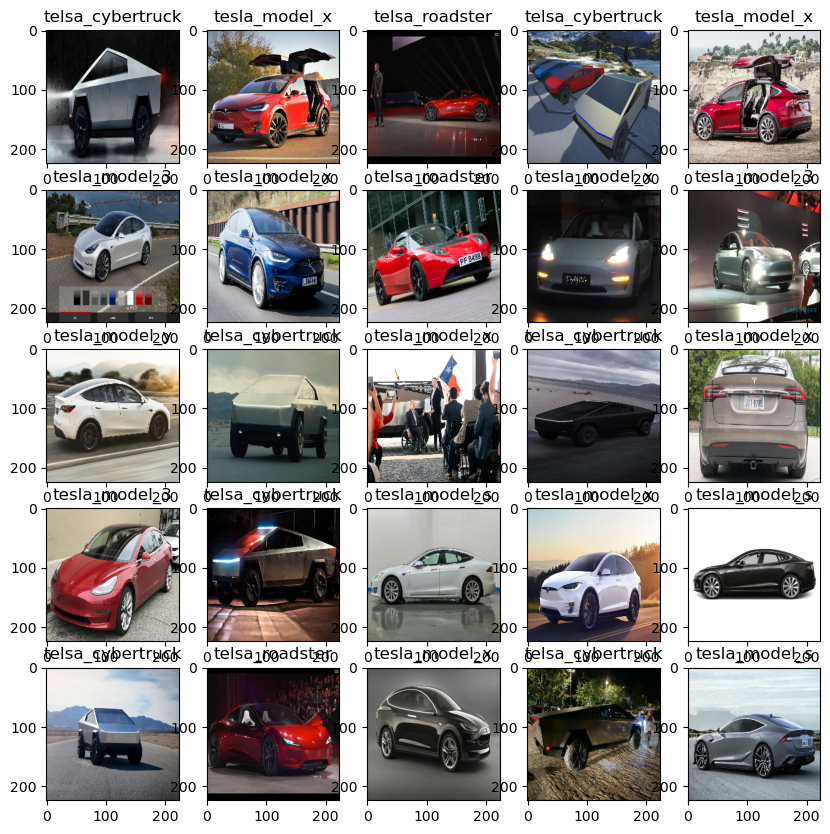

In [29]:
# This is an example photo of images and their title (Not 100% accurate)
show_25_images(train_images, train_labels)

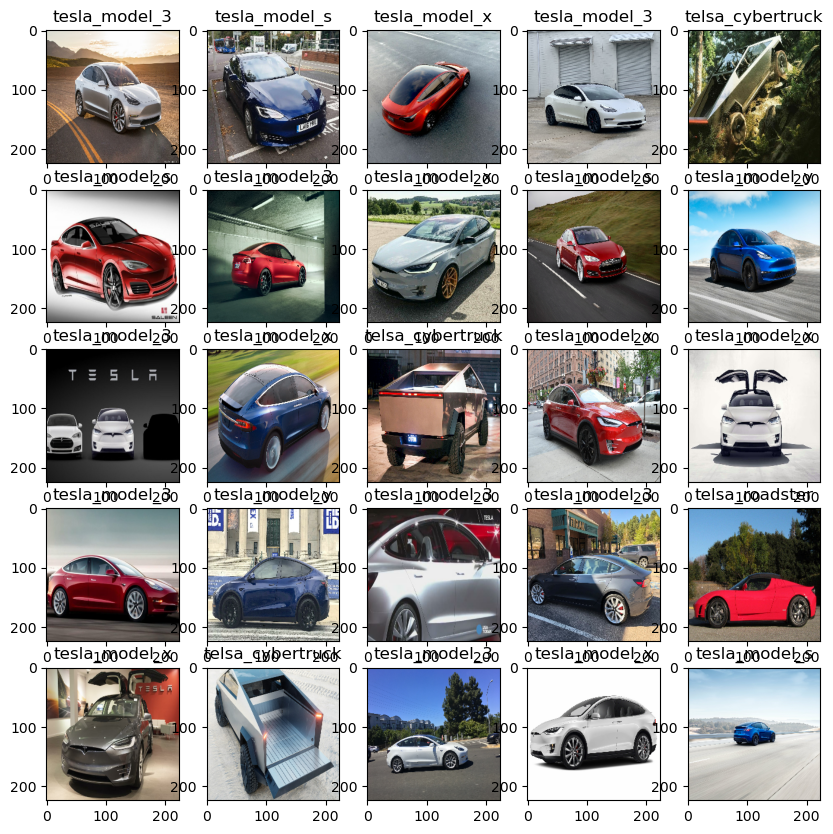

In [91]:
# now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a Model

In [31]:
# Setup the input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_models)

# Setup model URL from TensorFlowHub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [36]:
# Create a fucntion which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
    print("Building model with:", MODEL_URL)

    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
        activation="softmax") # layer 2 (output layer)
        ])

    # Complile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])
  
    # Build the model
    model.build(INPUT_SHAPE)

    return model

In [37]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 5,438,725
Trainable params: 6,012
Non-trainable params: 5,432,713
_________________________________________________________________


In [38]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [40]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("C:/Users/Jacki/anaconda mini/Cars for classification project/logs", 
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

    return tf.keras.callbacks.TensorBoard(logdir)

In [41]:
# Create early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [50]:
NUM_EPOCHS = 100

# Build a function to train and return a trained model
def train_model():
    """
    Trains a given model and returns the trained version.
    """

    # Create a model
    model = create_model()

    # Create a new TensorBoard session everytime we train a model 
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callback we created
    model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
    # Return the model 
    return model

In [51]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
29/29 [==============================] - 39s 1s/step - loss: 1.5017 - accuracy: 0.4096 - val_loss: 1.1918 - val_accuracy: 0.5652
Epoch 2/100
29/29 [==============================] - 34s 1s/step - loss: 0.9457 - accuracy: 0.6525 - val_loss: 1.0883 - val_accuracy: 0.6043
Epoch 3/100
29/29 [==============================] - 33s 1s/step - loss: 0.7898 - accuracy: 0.7102 - val_loss: 1.0333 - val_accuracy: 0.6043
Epoch 4/100
29/29 [==============================] - 34s 1s/step - loss: 0.6815 - accuracy: 0.7505 - val_loss: 1.0164 - val_accuracy: 0.6217
Epoch 5/100
29/29 [==============================] - 34s 1s/step - loss: 0.6328 - accuracy: 0.7865 - val_loss: 1.0033 - val_accuracy: 0.6261
Epoch 6/100
29/29 [==============================] - 33s 1s/step - loss: 0.5570 - accuracy: 0.8214 - val_loss: 0.9843 - val_accuracy: 0.6304
Epoch 7/100
29/29 [==============================] - 33s 1s/s

## Predicting On Our Model

In [52]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose = 1)
predictions

8/8 [==============================] - 8s 776ms/step


array([[6.48610558e-06, 1.00726087e-04, 8.63681734e-01, 1.04341105e-01,
        1.67161431e-02, 1.51539007e-02],
       [1.33924434e-04, 2.45490938e-01, 3.20276737e-01, 1.40727222e-01,
        5.91811445e-03, 2.87453085e-01],
       [2.56584550e-04, 5.81992641e-02, 9.39071596e-01, 1.52599509e-03,
        2.38394321e-04, 7.08237174e-04],
       ...,
       [4.77068330e-04, 2.49984296e-04, 5.84931768e-05, 4.61688942e-05,
        9.99152184e-01, 1.60603322e-05],
       [3.25909816e-04, 6.16603589e-04, 4.03032780e-01, 4.71443862e-01,
        1.47390354e-03, 1.23106927e-01],
       [3.29279646e-05, 2.21162453e-01, 7.51621246e-01, 9.37502366e-03,
        1.57492259e-03, 1.62334777e-02]], dtype=float32)

In [54]:
# First predictions lesson 244
index = 42

print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_models[np.argmax(predictions[index])]}")

[6.48610558e-06 1.00726087e-04 8.63681734e-01 1.04341105e-01
 1.67161431e-02 1.51539007e-02]
Max value (probability of prediction): 0.8636817336082458
Sum: 1.0
Max index: 1
Predicted label: telsa_roadster


In [56]:
# Turn prediction probabilites into their respective label (easier to understand)
def get_pred_label(prediction_probabilites):
    """
    Turns an array of prediction probabilites into a label.
    """
    return unique_models[np.argmax(prediction_probabilites)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'tesla_model_s'

In [58]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels
    """

    images = []
    labels = []

    # Loop through unbatch data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_models[np.argmax(label)])
    return images, labels

#unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.8470589 , 0.85098046, 0.8196079 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         ...,
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.89019614, 0.8588236 , 0.7686275 ]],
 
        [[0.8470589 , 0.85098046, 0.8196079 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         ...,
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.89019614, 0.8588236 , 0.7686275 ]],
 
        [[0.85098046, 0.854902  , 0.8235295 ],
         [0.8531513 , 0.8570729 , 0.82570034],
         [0.854902  , 0.8588236 , 0.82745105],
         ...,
         [0.90021014, 0.8688376 , 0.7786415 ],
         [0.8962886 , 0.864916  , 0.77471995],
         [0.8962886 , 0.864916  , 0.77471995]],
 
        ...,
 
        [[0.25784925, 0.21471198, 0.1990257 ],
         [0.38815272, 0.34501544, 0.32932

In [59]:
get_pred_label(val_labels[0])

'telsa_cybertruck'

In [60]:
images_ = []
labels_ = []

# Loop through unbatch data
for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

images_[0], labels_[0]

(array([[[0.8470589 , 0.85098046, 0.8196079 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         ...,
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.89019614, 0.8588236 , 0.7686275 ]],
 
        [[0.8470589 , 0.85098046, 0.8196079 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         [0.85098046, 0.854902  , 0.8235295 ],
         ...,
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.8941177 , 0.86274517, 0.7725491 ],
         [0.89019614, 0.8588236 , 0.7686275 ]],
 
        [[0.85098046, 0.854902  , 0.8235295 ],
         [0.8531513 , 0.8570729 , 0.82570034],
         [0.854902  , 0.8588236 , 0.82745105],
         ...,
         [0.90021014, 0.8688376 , 0.7786415 ],
         [0.8962886 , 0.864916  , 0.77471995],
         [0.8962886 , 0.864916  , 0.77471995]],
 
        ...,
 
        [[0.25784925, 0.21471198, 0.1990257 ],
         [0.38815272, 0.34501544, 0.32932

In [61]:
get_pred_label(labels_[0]), get_pred_label(predictions[0])

('tesla_model_3', 'tesla_model_3')

In [62]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    #Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)* 100, true_label), color=color)


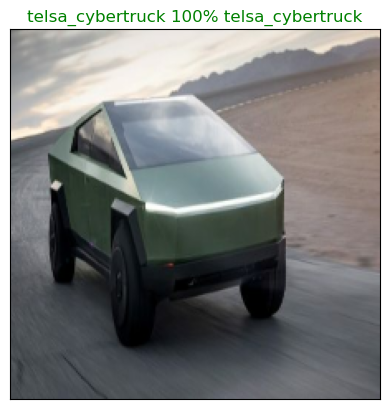

In [77]:
plot_pred(prediction_probabilities = predictions, labels = val_labels, images = val_images, n = 79)

In [66]:
def plot_pred_conf(prediction_probabilites, labels, n=1):
    """
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilites[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)
  
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # Find the top 10 prediction condidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find the top 10 prediction labels
    top_10_pred_labels = unique_models[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

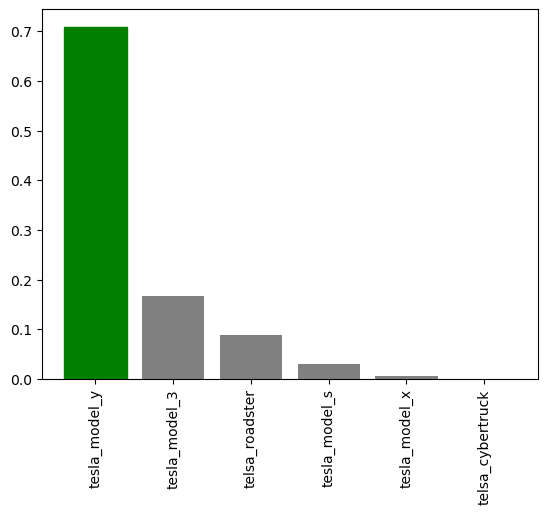

In [67]:
plot_pred_conf(prediction_probabilites = predictions, labels = val_labels, n = 9)

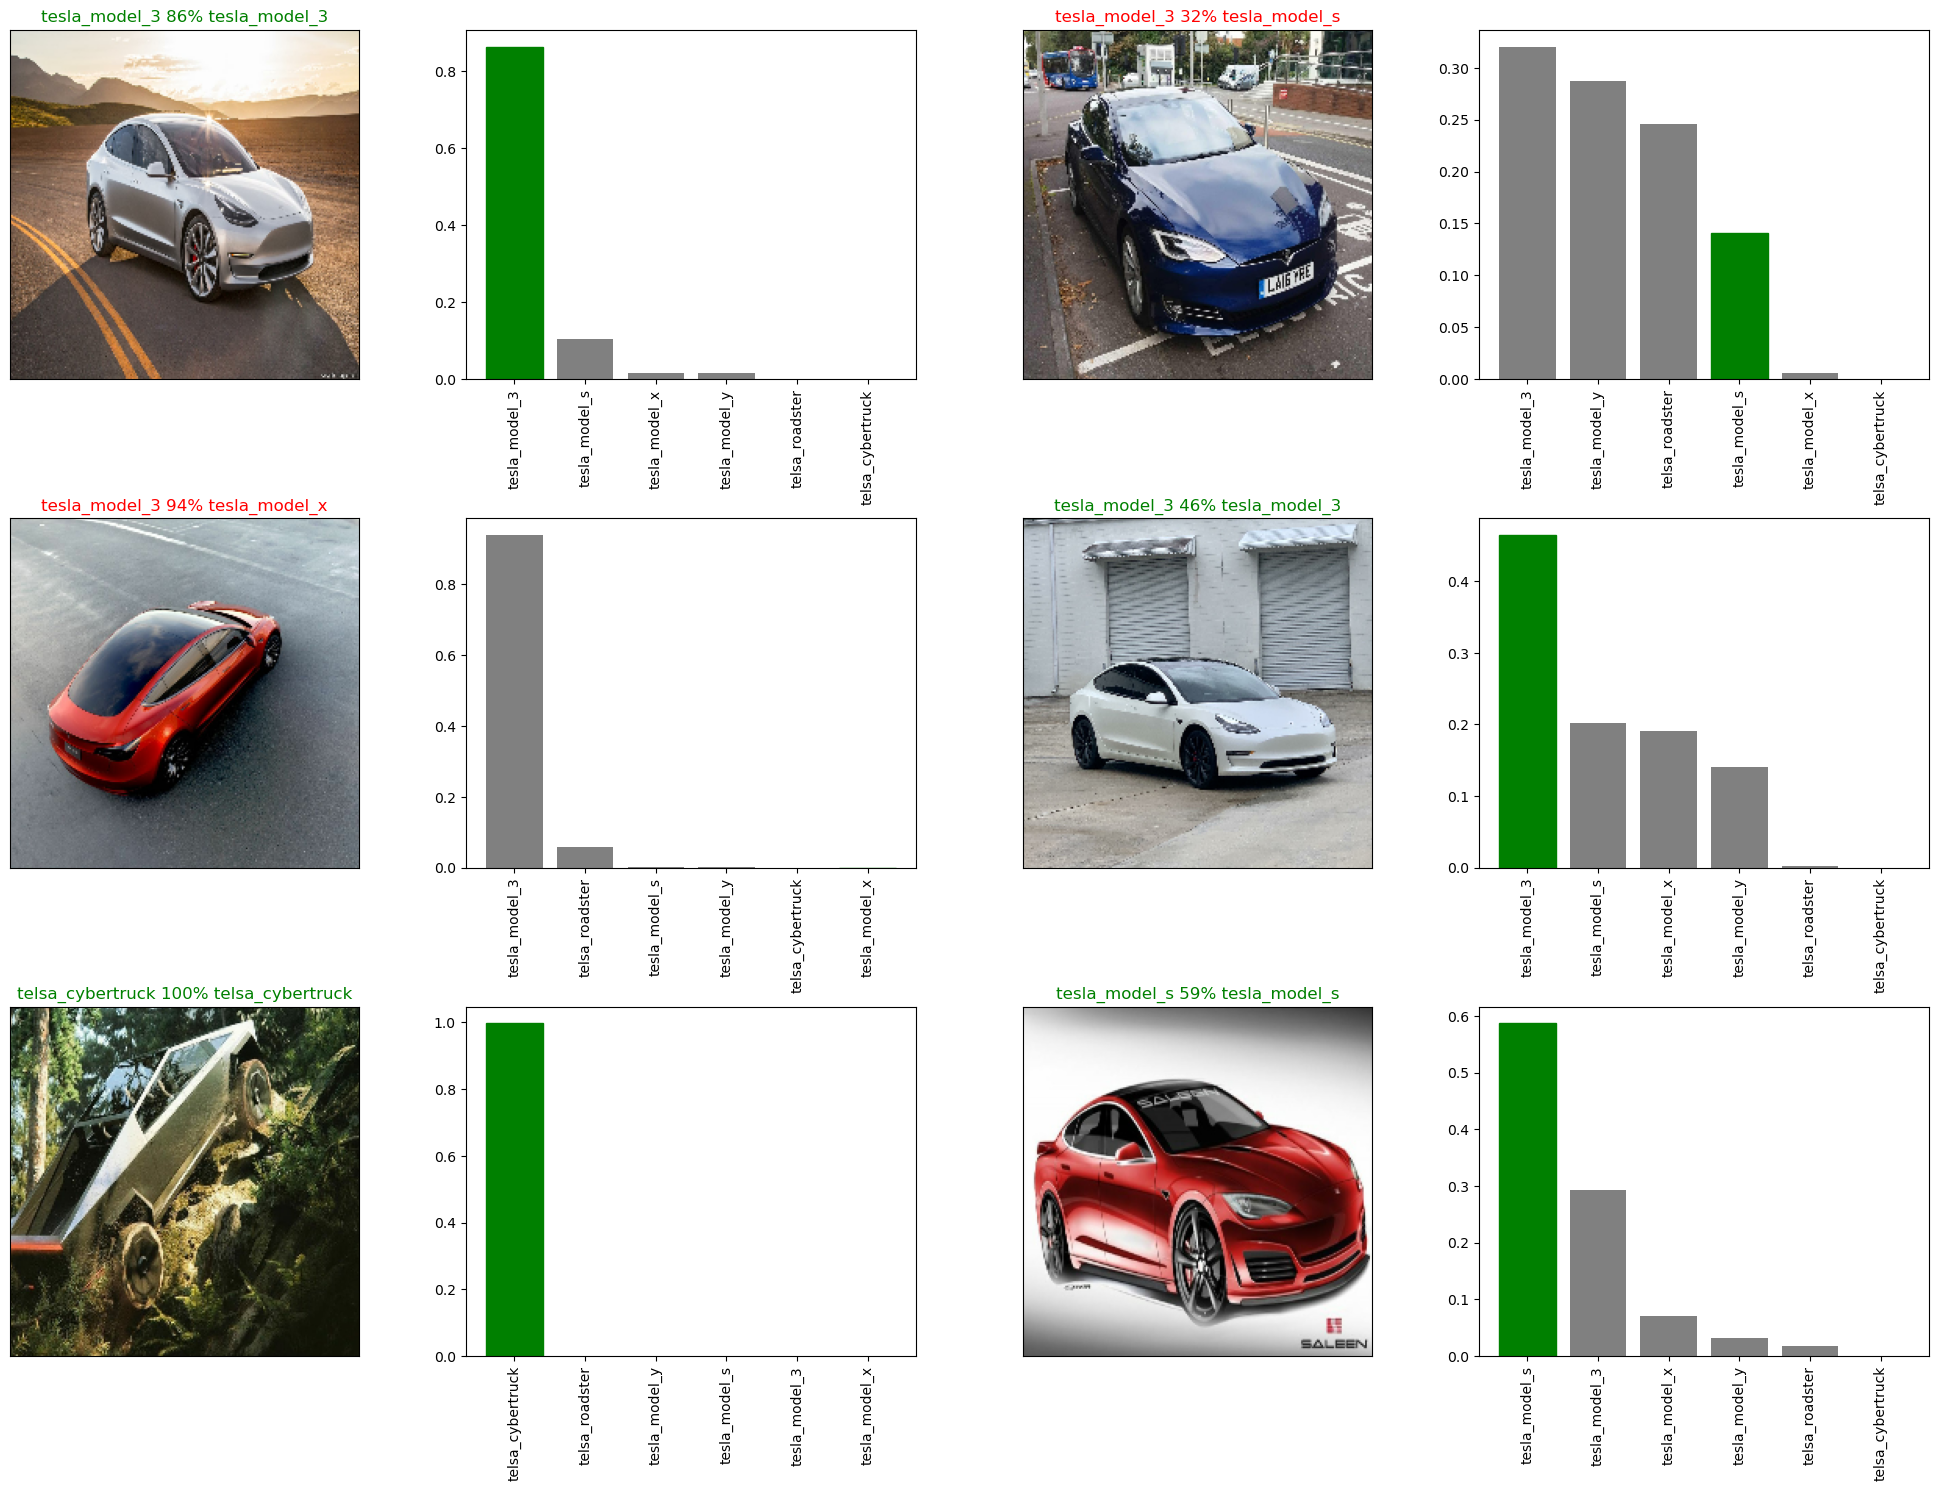

In [76]:
# let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_pred(prediction_probabilities=predictions,
            labels = val_labels,
            images = val_images,
            n = i+i_multiplier)
    plt.subplot(num_rows, 2* num_cols, 2* i + 2)
    plot_pred_conf(prediction_probabilites=predictions,
                 labels=val_labels,
                 n = i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()


In [69]:
# Create a function to save a model
def save_model(model, suffix = None):
    """ Saves a given model in a models directory and appends a suddix (string).
    """
    # Create a model directory pathname with current time
    modeldir = os.path.join("C:/Users/Jacki/anaconda mini/Cars for classification project",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to: {model_path}....")
    model.save(model_path)
    return model_path

In [70]:
# Create a function to load a model
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading save model from {model_path}")

    model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})

    return model

## Testing Our Model Using Random Photos

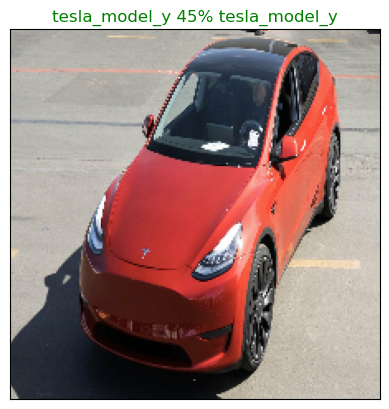

In [90]:
# This Can be Re-run to test the percentage chance the prediction is correct with a random image
random_image = random.randint(0, 230)
plot_pred(prediction_probabilities = predictions, labels = val_labels, images = val_images, n = random_image)